In [118]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report

In [119]:
data = pd.read_csv(r'income_unbalanced.csv')
data

age  workclass  fnlwgt     education  educational-num  \
0       67    Private  366425     Doctorate               16   
1       17    Private  244602          12th                8   
2       58  State-gov  110199       7th-8th                4   
3       25  State-gov  149248  Some-college               10   
4       59  State-gov  105363       HS-grad                9   
...    ...        ...     ...           ...              ...   
39745   52    Private   68982     Bachelors               13   
39746   19    Private  116562       HS-grad                9   
39747   30    Private  197947  Some-college               10   
39748   46    Private   97883     Bachelors               13   
39749   30    Private  375827       HS-grad                9   

           marital-status         occupation    relationship   race  gender  \
0                Divorced    Exec-managerial   Not-in-family  White    Male   
1           Never-married      Other-service       Own-child  White    Male   
2      Married-civ-spouse   Transport-moving         Husband  White    Male   
3           Never-married      Other-service   Not-in-family  Black    Male   
4           Never-married       Adm-clerical       Own-child  White    Male   
...                   ...                ...             ...    ...     ...   
39745  Married-civ-spouse    Exec-managerial         Husband  White    Male   
39746       Never-married      Other-service       Own-child  White  Female   
39747            Divorced              Sales   Not-in-family  White    Male   
39748       Never-married              Sales   Not-in-family  White  Female   
39749       Never-married  Handlers-cleaners  Other-relative  White    Male   

       capital-gain  capital-loss  hours-per-week native-country  income_>50K  
0             99999             0              60  United-States            1  
1                 0             0              15  United-States            0  
2                 0             0              40  United-States            0  
3                 0             0              40  United-States            0  
4                 0             0              40  United-States            0  
...             ...           ...             ...            ...          ...  
39745             0             0              50  United-States            1  
39746             0             0              40  United-States            0  
39747             0             0              58  United-States            0  
39748             0             0              35  United-States            0  
39749             0             0              40  United-States            0  

[39750 rows x 15 columns]

    –ù–∞—á–Ω—ë–º —Ç—Ä–∞–¥–∏—Ü–∏–æ–Ω–Ω–æ —Å –∞–Ω–∞–ª–∏–∑–∞, —á—Ç–æ –≤–æ–æ–±—â–µ –µ—Å—Ç—å —É –Ω–∞—Å –≤ –¥–∞–Ω–Ω—ã—Ö. –° —á–∏—Å–ª–æ–≤—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –≤—Å—ë –ø–æ–Ω—è—Ç–Ω–æ, –æ–¥–Ω–∞–∫–æ –≤ –¥–∞–Ω–Ω—ã—Ö –º–Ω–æ–≥–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –æ–Ω–∏ –ø—Ä–∏–Ω–∏–º–∞—é—Ç –∏ –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –ø–æ –¥–∞—Ç–∞—Å–µ—Ç—É.

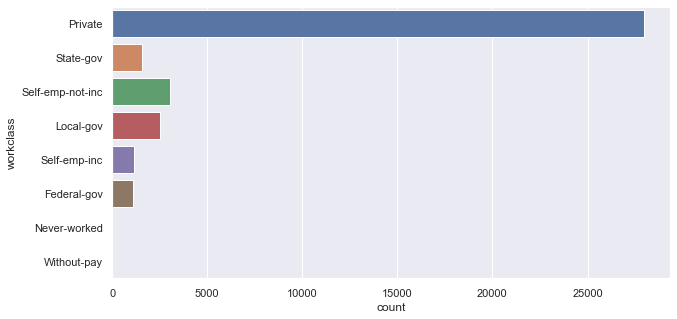

In [120]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10,5))
sns.countplot(data=data, y = data['workclass'])

    –í–∏–¥–∏–º, —á—Ç–æ –≤ –¥–∞–Ω–Ω—ã—Ö –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ—Ç –Ω–∏–∫–æ–≥–¥–∞ –Ω–µ —Ä–∞–±–æ—Ç–∞–≤—à–∏—Ö –∏ —Ä–∞–±–æ—Ç–∞—é—â–∏—Ö –±–µ–∑ –æ–ø–ª–∞—Ç—ã –ª—é–¥–µ–π. –ü–æ —Å–º—ã—Å–ª—É –ø—Ä–∏–∑–Ω–∞–∫–∞ –æ—á–µ–≤–∏–¥–Ω–æ, —á—Ç–æ —É —Ç–∞–∫–∏—Ö –ª—é–¥–µ–π –≤—Ä—è–¥ –ª–∏ –º–æ–∂–µ—Ç –±—ã—Ç—å –≥–æ–¥–æ–≤–∞—è –ø—Ä–∏–±—ã–ª—å –±–æ–ª—å—à–µ 50–∫. –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ –º–æ–¥–µ–ª—å –±—É–¥–µ—Ç –≤—Å–µ–≥–¥–∞ –≤—ã–¥–∞–≤–∞—Ç—å –æ—Ç–≤–µ—Ç 0 –ø—Ä–∏ —ç—Ç–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö –≤ –¥–∞–Ω–Ω–æ–º —Å—Ç–æ–ª–±—Ü–µ, –∏ —É–±–µ—Ä—ë–º –∏—Ö.
    
    –í –≤–∏–¥—É —Ç–æ–≥–æ, —á—Ç–æ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –≤—Å–µ –æ–ø—Ä–æ—à–µ–Ω–Ω—ã–µ –¥–ª—è –¥–∞—Ç–∞—Å–µ—Ç–∞ –ª—é–¥–∏ –∏–º–µ—é—Ç workclass Private, –º–æ–∂–µ–º –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –¥—Ä—É–≥–∏–µ –∫–ª–∞—Å—Å—ã –ø–æ —Å–º—ã—Å–ª—É.

In [121]:
without_income = ['Never-worked', 'Without-pay']
data = data[data['workclass'].isin(without_income) == False]

work_classes = {
    'government': ['State-gov', 'Local-gov', 'Federal-gov'],
    'self_employed': ['Self-emp-inc', 'Self-emp-not-inc']
}

for name, values in work_classes.items():
    data = data.replace(values, name)

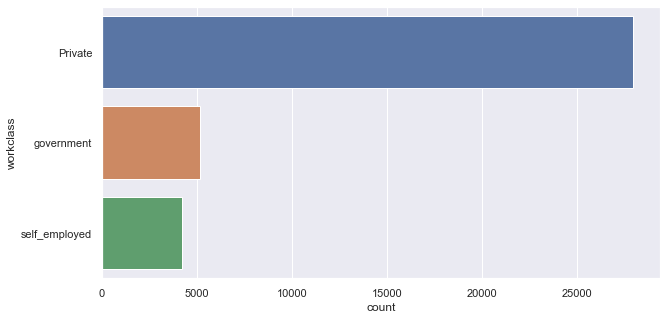

In [122]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, y = data['workclass'])

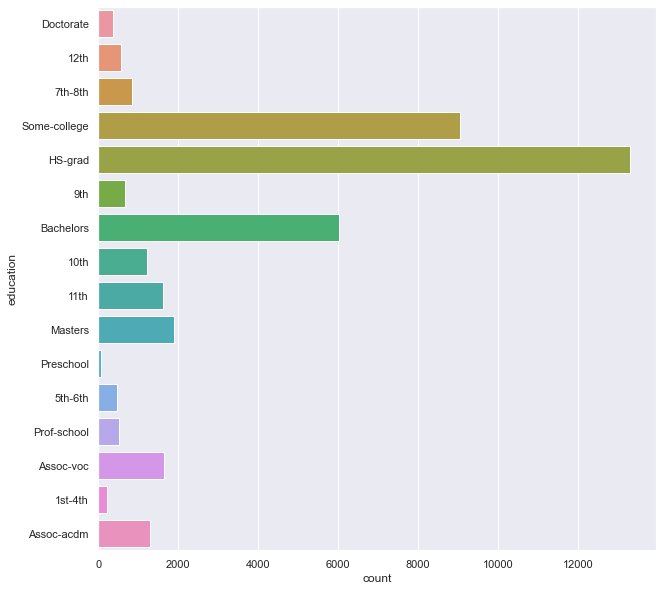

In [123]:
plt.figure(figsize=(10,10))
sns.countplot(data=data, y = data['education'])

    –¢–∞–∫ –∫–∞–∫ –ø–æ–∑–∂–µ —Å—Ç–∞–Ω–µ—Ç –≤–∏–¥–Ω–æ, —á—Ç–æ –±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å –ª—é–¥–µ–π, –æ–ø—Ä–æ—à–µ–Ω–Ω—ã—Ö –¥–ª—è –¥–∞—Ç–∞—Å–µ—Ç–∞, –ø–æ–ø—Ä–æ–±—É–µ–º –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –æ—Ñ–∏—Ü–∏–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –æ —Å—Ç—É–ø–µ–Ω—è—Ö –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –≤ —à—Ç–∞—Ç–∞—Ö. –û–±—ä–µ–¥–∏–Ω–∏–º –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –Ω–µ–º–Ω–æ–≥–æ–ª—é–¥–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –ø–æ —Å–º—ã—Å–ª—É, —á—Ç–æ–±—ã —É–º–µ–Ω—å—à–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–æ–∑–º–æ–∂–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏ –∏–º–µ—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å —É–¥–æ–±–Ω–µ–µ –ø–æ—Ç–æ–º –∏—Ö –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å.

In [124]:
dergees = {
    'basic_school': ['Preschool', '1st-4th', '5th-6th', '7th-8th'],
    'high_school': ['9th', '10th', '11th', '12th'],
    'associate': ['Assoc-acdm', 'Assoc-voc'],
    'university_degree': ['Doctorate','Bachelors','Some-college','Masters','Prof-school']
}

for name, values in dergees.items():
    data = data.replace(values, name)

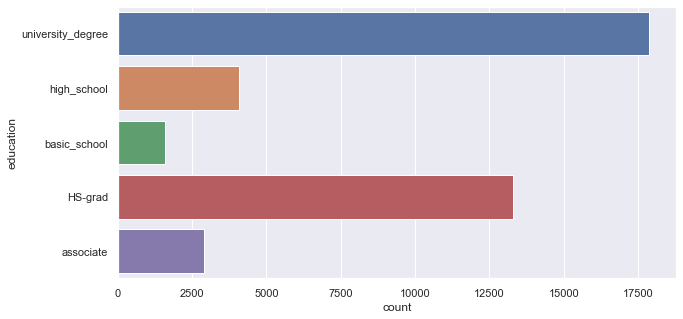

In [125]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, y = data['education'])

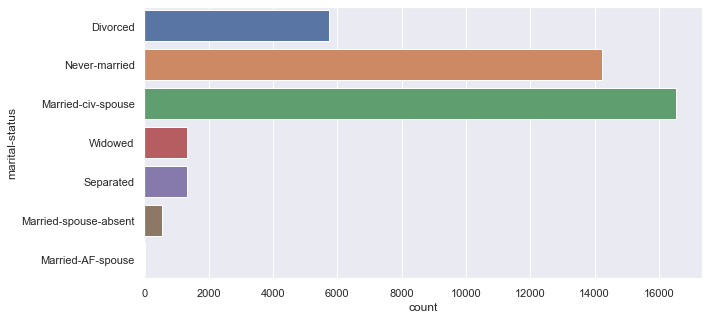

In [126]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, y = data['marital-status'])

    –ß—Ç–æ –∫–∞—Å–∞–µ—Ç—Å—è —Å–µ–º–µ–π–Ω–æ–≥–æ –ø–æ–ª–æ–∂–µ–Ω–∏—è, —Ç–æ –∏—Å—Ö–æ–¥—è –∏–∑ —Å–º—ã—Å–ª–∞ –ø—Ä–∏–∑–Ω–∞–∫–∞, –Ω–∞—Å –±—É–¥–µ—Ç –≤ –æ–±—â–µ–º-—Ç–æ –∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞—Ç—å —Ç–æ–ª—å–∫–æ —Å–æ—Å—Ç–æ–∏—Ç —á–µ–ª–æ–≤–µ–∫ –≤ –±—Ä–∞–∫–µ –∏–ª–∏ –Ω–µ—Ç. –¢.–∫. –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –±—É–¥–µ—Ç –≤—Å–µ–≥–æ 2 –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Ç–∞–∫–æ–º —Å–ª—É—á–∞–µ, –º–æ–∂–µ–º –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å –∏—Ö –ø—É—Ç—ë–º –ø—Ä—è–º–æ–π –Ω—É–º–µ—Ä–∞—Ü–∏–∏ 1 - –Ω–µ –≤ –±—Ä–∞–∫–µ, 0 - –≤ –±—Ä–∞–∫–µ.

In [127]:
status = {
    'single': ['Divorced', 'Never-married', 'Widowed', 'Separated'],
    'married': ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
}

for name, values in status.items():
    data = data.replace(values, name)

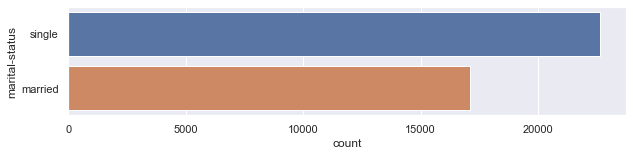

In [128]:
plt.figure(figsize=(10,2))
sns.countplot(data=data, y = data['marital-status'])

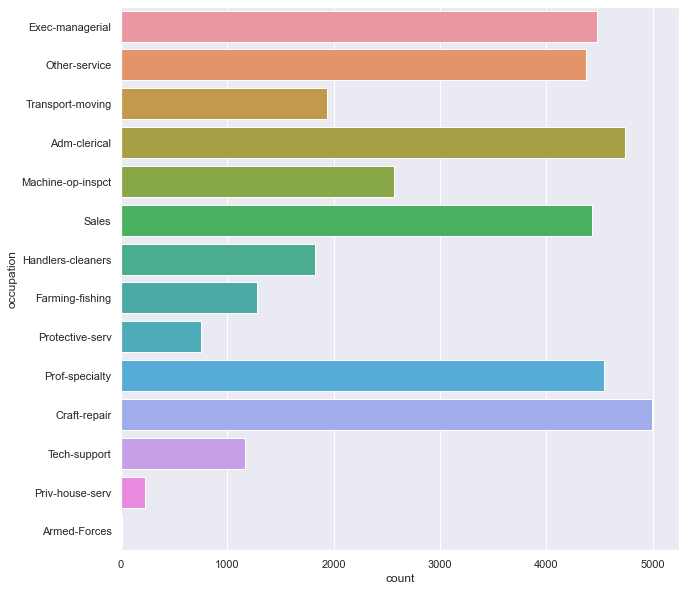

In [129]:
plt.figure(figsize=(10,10))
sns.countplot(data=data, y = data['occupation'])

    –ü—Ä–∏–∑–Ω–∞–∫ occupation –æ–±–æ–∑–Ω–∞—á–∞–µ—Ç —Å—Ñ–µ—Ä—É –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏, –≤ –∫–æ—Ç–æ—Ä–æ–π —Ä–∞–±–æ—Ç–∞–µ—Ç —á–µ–ª–æ–≤–µ–∫. –°–ª–æ–∂–Ω–æ –∫–∞–∫-—Ç–æ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞—Ç—å –∏–ª–∏ –≤—ã–¥–µ–ª–∏—Ç—å –∫–ª—é—á–µ–≤—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é, –∫–æ—Ç–æ—Ä—É—é –æ–Ω –º–æ–∂–µ—Ç –Ω–µ—Å—Ç–∏. –î–∞–Ω–Ω—ã–µ –¥–æ–≤–æ–ª—å–Ω–æ –Ω–µ–ø–ª–æ—Ö–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –ø–æ —Ä–∞–∑–ª–∏—á–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º –∑–¥–µ—Å—å, —Ç–∞–∫ —á—Ç–æ –Ω–µ—Ç –æ—Å–æ–±–æ–≥–æ —Å–º—ã—Å–ª–∞ –∫–∞–∫-—Ç–æ –º–µ–Ω—è—Ç—å —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫.

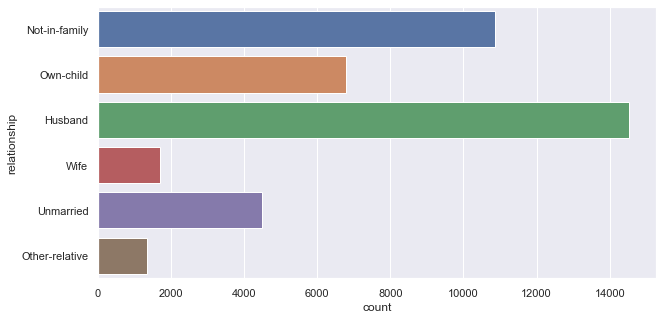

In [130]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, y = data['relationship'])

    –ü—Ä–∏–∑–Ω–∞–∫ relationship —á–∞—Å—Ç–∏—á–Ω–æ –ø–æ–≤—Ç–æ—Ä—è–µ—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –≥—Ä–∞–∂–¥–∞–Ω—Å–∫–æ–º —Å–æ—Å—Ç–æ—è–Ω–∏–∏ —á–µ–ª–æ–≤–µ–∫–∞, –∫–æ—Ç–æ—Ä–∞—è —É –Ω–∞—Å —É–∂–µ –µ—Å—Ç—å –≤ –ø—Ä–µ–¥—ã–¥—É—â–µ–º –ø—Ä–∏–∑–Ω–∞–∫–µ. –ö—Ä–æ–º–µ —ç—Ç–æ–≥–æ –∑–¥–µ—Å—å —Ç–∞–∫–∂–µ –ø–æ–≤—Ç–æ—Ä—è–µ—Ç—Å—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –ø–æ–ª–æ–≤–æ–π –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏, —Ç.–∫. –µ—Å—Ç—å –º—É–∂/–∂–µ–Ω–∞. –ù–µ –æ—á–µ–Ω—å –ø–æ–Ω—è—Ç–Ω–æ, –∫–∞–∫–æ–π —Å–º—ã—Å–ª –Ω–µ—Å—ë—Ç –∑–Ω–∞—á–µ–Ω–∏–µ own-child. –ï—Å–ª–∏ —ç—Ç–æ —Å–µ–º—å–∏ —Å –¥–µ—Ç—å–º–∏, —Ç–æ —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –º–æ–≥ –±—ã –±—ã—Ç—å –ø–æ–ª–µ–∑–Ω—ã–º, –Ω–æ –µ—Å–ª–∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏—Ç–æ–≥–æ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π income_>50k, —Ç–æ –ø–æ–ª—É—á–∞–µ—Ç—Å—è —Å—Ç—Ä–∞–Ω–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞, —á—Ç–æ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –≤—Å–µ –æ–Ω–∏ –∏–º–µ—é—Ç –º–∞–ª—ã–π –¥–æ—Ö–æ–¥:

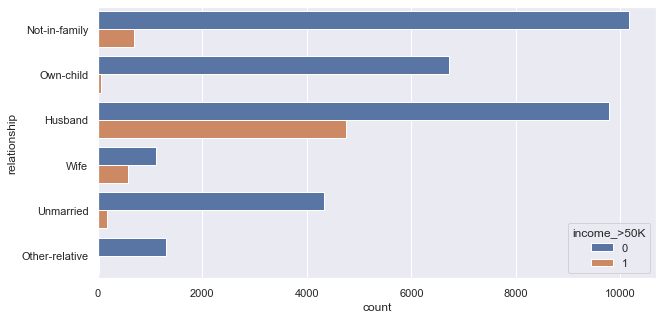

In [131]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, y='relationship', hue='income_>50K')

    –¢.–∫. –∞–Ω–∞–ª–∏–∑ —Å–º—ã—Å–ª–∞ –¥–∞–Ω–Ω–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –Ω–µ –ø–æ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∏—á–µ–≥–æ —É–º–Ω–æ–≥–æ, –æ—Å—Ç–∞–≤–∏–º –µ–≥–æ, –∫–∞–∫ –µ—Å—Ç—å.

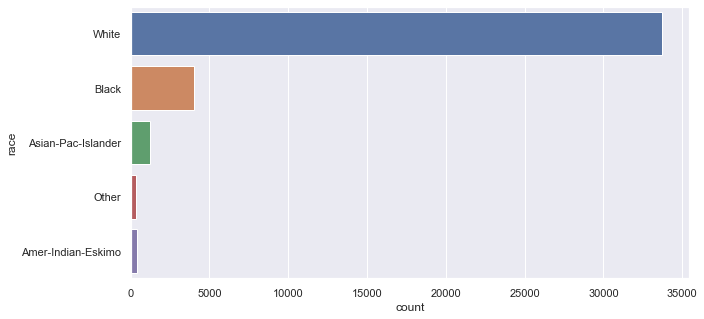

In [132]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, y = data['race'])

    –¢.–∫. –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ª—é–¥–µ–π –≤ –æ–ø—Ä–æ—Å–µ white, –≤–æ–∑—å–º—ë–º –∏–∑ —ç—Ç–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ —Ç–æ–ª—å–∫–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ç–æ–º, White –Ω–∞—à —á–µ–ª–æ–≤–µ–∫ –∏–ª–∏ –Ω–µ—Ç.

In [133]:
race = {
    'other': ['Black', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo']
}

for name, values in race.items():
    data = data.replace(values, name)

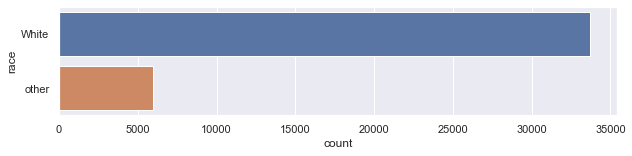

In [134]:
plt.figure(figsize=(10,2))
sns.countplot(data=data, y = data['race'])

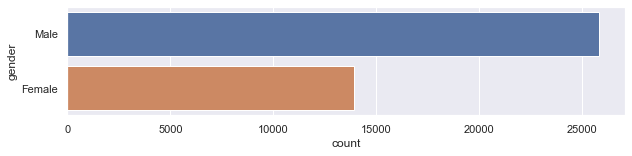

In [135]:
plt.figure(figsize=(10,2))
sns.countplot(data=data, y = data['gender'])

    –ö–∞–∫ –ø–æ—Å—Ç—É–ø–∏–º —Å –ø–æ–ª–æ–º, —É–∂–µ –ø–æ–Ω—è—Ç–Ω–æ:)

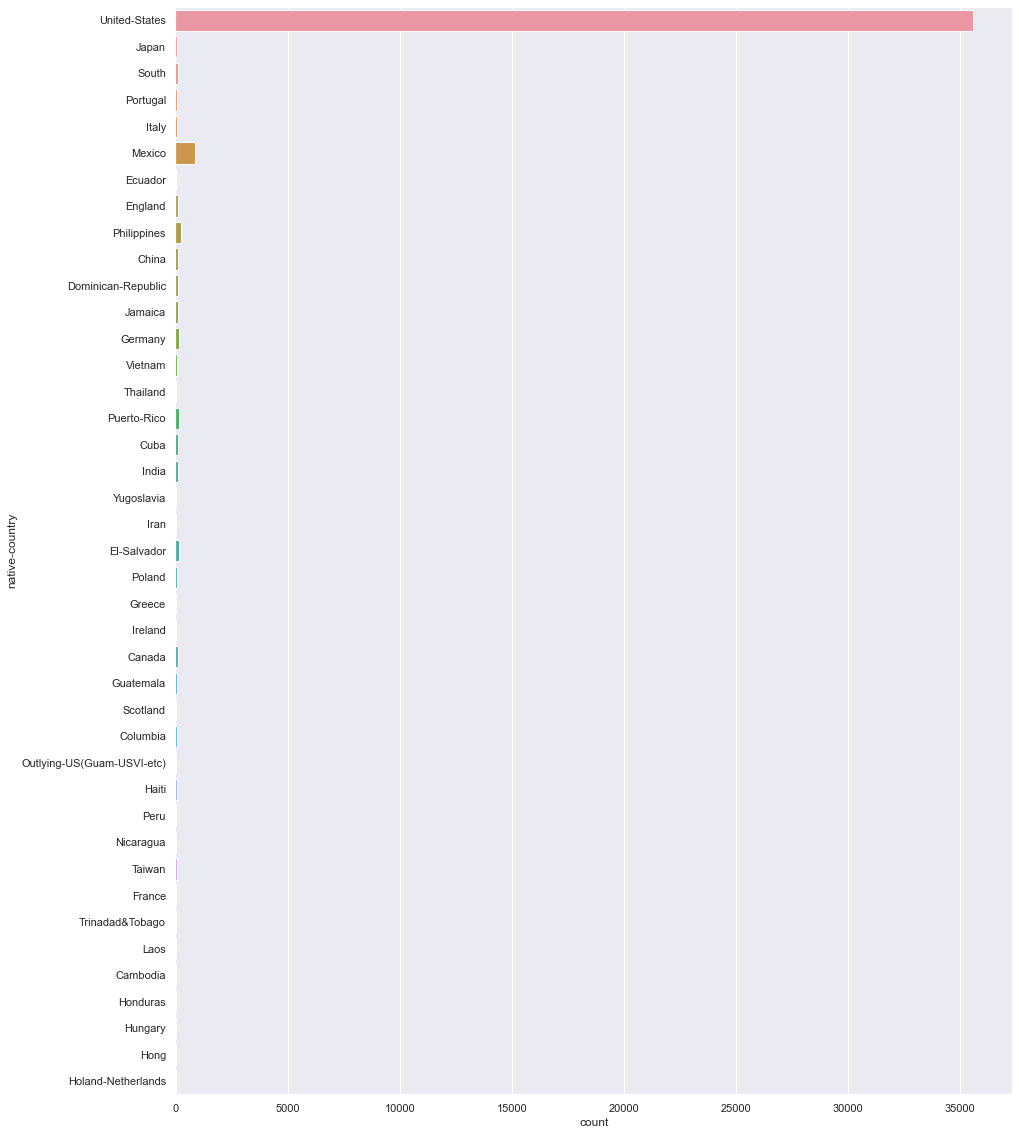

In [136]:
plt.figure(figsize=(15,20))
sns.countplot(data=data, y = data['native-country'])

    –ò –≤–æ—Ç –Ω–∞–∫–æ–Ω–µ—Ü –º—ã –ø—Ä–∏—à–ª–∏ –∫ –ø—Ä–∏–∑–Ω–∞–∫—É —Ä–æ–¥–Ω–æ–π —Å—Ç—Ä–∞–Ω—ã. –£ –Ω–∞—Å –ø–æ—á—Ç–∏ –≤—Å–µ –æ–ø—Ä–æ—à–µ–Ω–Ω—ã–µ –≥—Ä–∞–∂–¥–∞–Ω–µ —Ä–æ–¥–æ–º –∏–∑ USA, –≤ —Ü–µ–ª–æ–º –Ω–µ –∏–º–µ–µ—Ç –æ—Å–æ–±–æ–≥–æ —Å–º—ã—Å–ª–∞ –æ—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å—Å—è –Ω–∞ —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫, —Ç.–∫. –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å —É—Ä–æ–∂–µ–Ω—Ü–∞–º–∏ USA –¥—Ä—É–≥–∏–µ —Å—Ç—Ä–∞–Ω—ã –æ—á–µ–Ω—å –º–∞–ª–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã.

    –¢–µ–ø–µ—Ä—å –Ω–∞–∫–æ–Ω–µ—Ü –∑–∞–∫–æ–¥–∏—Ä—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏.

In [137]:
data['gender'] = pd.get_dummies(data['gender'], drop_first=True)
data['marital-status'] = pd.get_dummies(data['marital-status'], drop_first=True)
data['race'] = pd.get_dummies(data['race'], drop_first=True)

    –ß—Ç–æ–±—ã –Ω–µ –ø–ª–æ–¥–∏—Ç—å –º–Ω–æ–≥–æ —Å—Ç–æ–ª–±—Ü–æ–≤ —Å –±–æ–ª—å—à–∏–º —á–∏—Å–ª–æ–º –Ω—É–ª–µ–π –ø—É—Ç—ë–º one-hot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è –≤—Å–µ—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –±—ã–ª–æ —Ä–µ—à–µ–Ω–æ –Ω–∞–π—Ç–∏ –∫–∞–∫–æ–π-–Ω–∏–±—É–¥—å –≤–∞—Ä–∏–∞–Ω—Ç –ø–æ–∏–Ω—Ç–µ–ª–ª–µ–∫—Ç—É–∞–ª—å–Ω–µ–µ, –Ω–æ –Ω–µ –æ—á–µ–Ω—å —Å–ª–æ–∂–Ω—ã–π. –ü–æ—ç—Ç–æ–º—É –±—ã–ª –≤—ã–±—Ä–∞–Ω target-encoder, –µ—Å–ª–∏ —è –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø–æ–Ω—è–ª–∞ —Å–º—ã—Å–ª, –æ–Ω –∑–∞–º–µ–Ω—è–µ—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏—é (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∫–∞—Ç–µ–≥–æ—Ä–∏—è Private –ø—Ä–∏–∑–Ω–∞–∫–∞ workclass) –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é –ø–æ—è–≤–ª–µ–Ω–∏—è 1 –≤ —Ü–µ–ª–µ–≤–æ–º –ø—Ä–∏–∑–Ω–∞–∫–µ (income_>50K –≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ) –ø—Ä–∏ —É—Å–ª–æ–≤–∏–∏, —á—Ç–æ –∫–æ–¥–∏—Ä—É–µ–º—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –¥–∞–Ω–Ω—É—é –∫–∞—Ç–µ–≥–æ—Ä–∏—é (—Ç.–µ. P {income_>50K = 1 | workclass = Private}).
    
    (One-hot —è —Ç–æ–∂–µ –ø–æ–ø—Ä–æ–±–æ–≤–∞–ª–∞, –Ω–æ –ø–æ–ª—É—á–∏–ª–æ—Å—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —É–∂–∞—Å–Ω–æ, —Ä–µ—à–∏–ª–∞ –Ω–µ –æ—Å—Ç–∞–≤–ª—è—Ç—å –¥–∞–∂–µ –¥–ª—è –ø—Ä–∏–º–µ—Ä–∞.)

In [138]:
import category_encoders as ce

category_columns = ['workclass', 'education', 'occupation', 'relationship', 'native-country']
encoder = ce.TargetEncoder(
    cols=category_columns
)
    
data[category_columns] = encoder.fit_transform(data[category_columns], data['income_>50K']).astype('float32')
data

age  workclass  fnlwgt  education  educational-num  marital-status  \
0       67   0.142980  366425   0.240336               16               1   
1       17   0.142980  244602   0.034984                8               1   
2       58   0.217611  110199   0.031546                4               0   
3       25   0.217611  149248   0.240336               10               1   
4       59   0.217611  105363   0.100211                9               1   
...    ...        ...     ...        ...              ...             ...   
39745   52   0.142980   68982   0.240336               13               0   
39746   19   0.142980  116562   0.100211                9               1   
39747   30   0.142980  197947   0.240336               10               1   
39748   46   0.142980   97883   0.240336               13               1   
39749   30   0.142980  375827   0.100211                9               1   

       occupation  relationship  race  gender  capital-gain  capital-loss  \
0        0.358356      0.063881     0       1         99999             0   
1        0.025143      0.009869     0       1             0             0   
2        0.123259      0.327325     0       1             0             0   
3        0.025143      0.063881     1       1             0             0   
4        0.086443      0.009869     0       1             0             0   
...           ...           ...   ...     ...           ...           ...   
39745    0.358356      0.327325     0       1             0             0   
39746    0.025143      0.009869     0       0             0             0   
39747    0.180894      0.063881     0       1             0             0   
39748    0.180894      0.063881     0       0             0             0   
39749    0.041712      0.019447     0       1             0             0   

       hours-per-week  native-country  income_>50K  
0                  60        0.163044            1  
1                  15        0.163044            0  
2                  40        0.163044            0  
3                  40        0.163044            0  
4                  40        0.163044            0  
...               ...             ...          ...  
39745              50        0.163044            1  
39746              40        0.163044            0  
39747              58        0.163044            0  
39748              35        0.163044            0  
39749              40        0.163044            0  

[39724 rows x 15 columns]

    –ò –Ω–∞–∫–æ–Ω–µ—Ü –ø–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫–∏–µ –¥–∞–Ω–Ω—ã–µ —É –Ω–∞—Å –ø–æ–ª—É—á–∏–ª–∏—Å—å.

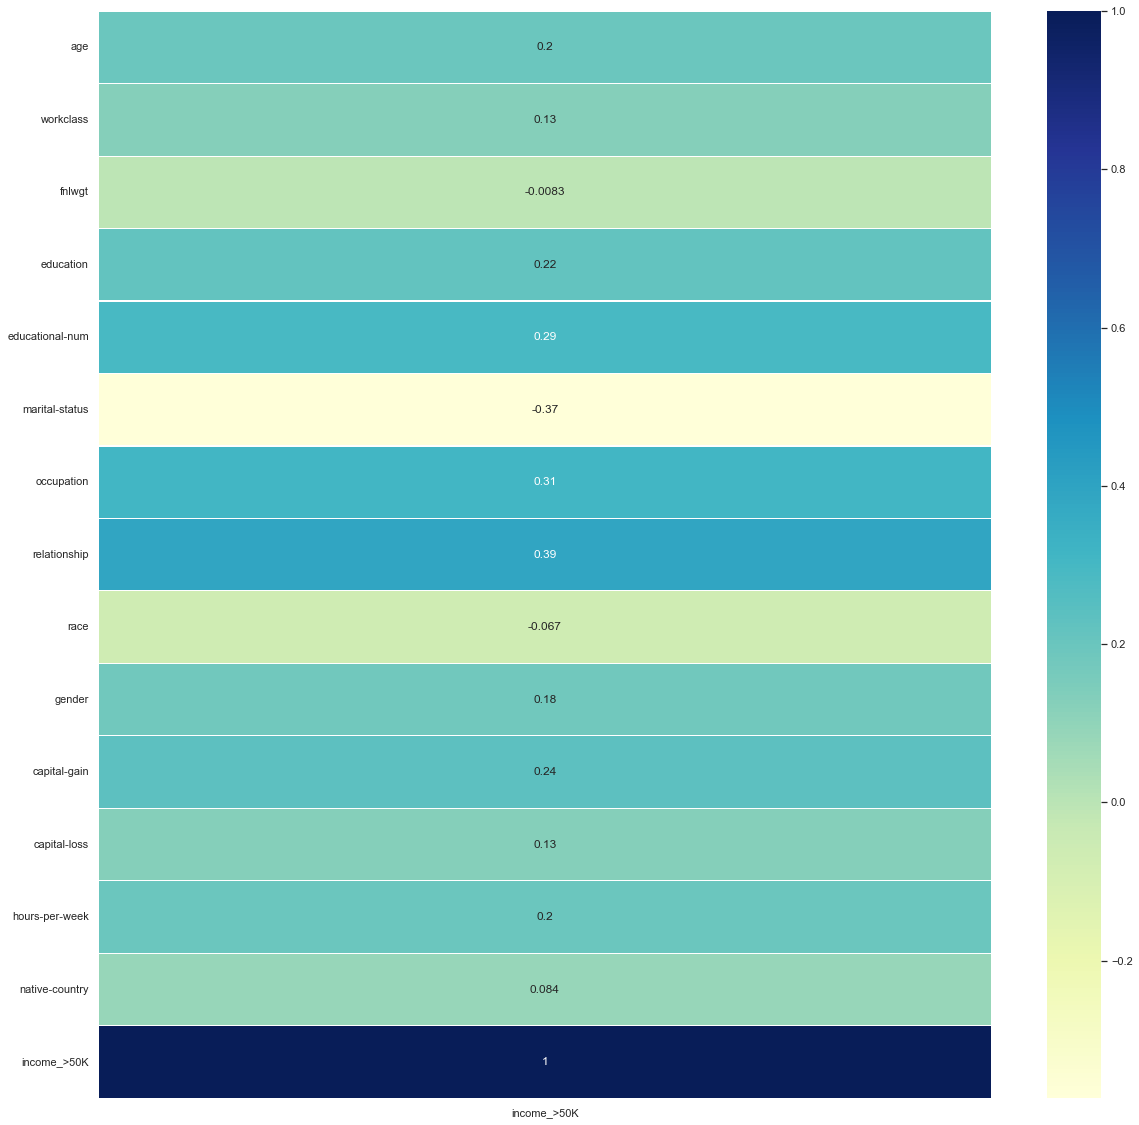

In [139]:
corrmat = data.corr()
corrmat = pd.DataFrame(corrmat['income_>50K'])

plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, cmap ="YlGnBu", linewidths = 0.1, annot=True,)

    –ù–µ–∫–æ—Ç–æ—Ä—ã–µ –¥–∞–Ω–Ω—ã–µ –Ω–µ –Ω–µ—Å—É—Ç –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–∏–∫–∞–∫–æ–π –ø–æ–ª–µ–∑–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, —á—Ç–æ –≤–∏–¥–Ω–æ –≤—ã—à–µ –ø–æ —Ç–æ–º—É, —á—Ç–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å –∏—Å–∫–æ–º—ã–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º —É –Ω–∏—Ö –Ω–∏—á—Ç–æ–∂–Ω–æ –º–∞–ª–µ–Ω—å–∫–∞—è –∏ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤–æ–∑–ª–µ –Ω—É–ª—è. –ü—Ä–∏ —ç—Ç–æ–º –≤ —Ç–∞–∫–∏—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–∞—Ö, –∫–∞–∫ —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å, –æ—á–µ–≤–∏–¥–Ω–æ, —á—Ç–æ –Ω–∞–ª–∏—á–∏–µ —Ç–∞–∫–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –±—É–¥–µ—Ç —Ç–æ–ª—å–∫–æ –º–µ—à–∞—Ç—å, —Ç.–∫. –º—ã –±—É–¥–µ–º –≤—ã–Ω—É–∂–¥–∞—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä –ø—Ä–∏–Ω–∏–º–∞—Ç—å —Ä–µ—à–µ–Ω–∏—è –ø–æ —Ç–∞–∫–∏–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º –≤ —Ç–æ–º —á–∏—Å–ª–µ. –ü–æ —Å–µ–º—É –±—ã–ª–æ –ø—Ä–∏–Ω—è—Ç–æ –≤–æ–ª–µ–≤–æ–µ —Ä–µ—à–µ–Ω–∏–µ –¥—Ä–æ–ø–Ω—É—Ç—å –∏—Ö, —á—Ç–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ —Å–∫–∞–∑–∞–ª–æ—Å—å –Ω–∞ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞—Ö.

In [140]:
data = data.drop(['fnlwgt', 'race', 'native-country'], axis=1)

    –°—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–∞–¥–∏ –±—ã–ª–∏ –≤–∑—è—Ç—ã —Å–ª–µ–¥—É—é—â–∏–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã: –¥–µ—Ä–µ–≤–æ, —Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å, –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä –Ω–∞ –æ—Å–Ω–æ–≤–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞. –î–ª—è —á–µ—Å—Ç–Ω–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã–µ –±—ã–ª–∏ —Ä–∞–∑–¥–µ–ª–µ–Ω—ã –Ω–∞ 5 —Ñ–æ–ª–¥–æ–≤ –¥–ª—è –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏.

In [141]:
k = 5

X, y = data.drop(columns='income_>50K'), data['income_>50K']
kfold = KFold(k, shuffle=True, random_state=42)

for i, (train, test) in enumerate(kfold.split(data)):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]

    forest = RandomForestClassifier(
        n_estimators=100,
        max_features = 4,
        max_depth=5,
        n_jobs=4,
        bootstrap=True
    )
    
    tree = DecisionTreeClassifier(
        max_depth=5
    )
    
    tree.fit(X_train, y_train)
    forest.fit(X_train, y_train)

    y_predicted_forest = forest.predict(X_test)
    y_predicted_tree = tree.predict(X_test) 
    
    print(f'\n================= Fold {i+1} =====================')
    
    print('\t'*3,'Tree', u"\U0001F333")
    print(classification_report(y_test, y_predicted_tree))
    print('ROC-AUC score', roc_auc_score(y_test, y_predicted_tree), '\n')
    
    print('\t'*2,'Forest', u"\U0001F333"*6)
    print(classification_report(y_test, y_predicted_forest))
    print('ROC-AUC score', roc_auc_score(y_test, y_predicted_forest), '\n')
    
    logreg = LogisticRegression(
        penalty='l2',
        max_iter=1000
    )
    
    scaler = MinMaxScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)
    
    logreg.fit(X_train_norm, y_train)
    y_predicted_logreg = logreg.predict(X_test_norm)
    
    print('\t'*2,'Logistic regression',)
    print(classification_report(y_test, y_predicted_logreg))
    print('ROC-AUC score', roc_auc_score(y_test, y_predicted_logreg), '\n')
    
    boosting = GradientBoostingClassifier(
        max_depth=1,
        min_samples_leaf=5,
        learning_rate=0.5,
        n_estimators=100
    )

    boosting.fit(X_train, y_train)
    y_predicted_boosting = boosting.predict(X_test)
    
    print('\t'*2,'Gradient boosting',)
    print(classification_report(y_test, y_predicted_boosting))
    print('ROC-AUC score', roc_auc_score(y_test, y_predicted_boosting), '\n')


================= Fold 1 =====================
			 Tree üå≥
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      6647
           1       0.73      0.51      0.60      1298

    accuracy                           0.89      7945
   macro avg       0.82      0.74      0.77      7945
weighted avg       0.88      0.89      0.88      7945

ROC-AUC score 0.7378091834702819 

		 Forest üå≥üå≥üå≥üå≥üå≥üå≥
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      6647
           1       0.78      0.47      0.58      1298

    accuracy                           0.89      7945
   macro avg       0.84      0.72      0.76      7945
weighted avg       0.88      0.89      0.88      7945

ROC-AUC score 0.720967416281729 

		 Logistic regression
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6647
           1       0.73      0.45      0.55     

    –í–æ—Ç —Ç–∞–∫–æ–π –≤–æ—Ç –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–π –Ω–∞ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö –∏–º–µ–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç. –ö—Ä–æ–º–µ —ç—Ç–æ–≥–æ —Ç–∞–∫–∂–µ –±—ã–ª –ø—Ä–æ–≤–µ–¥—ë–Ω —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç –ø–æ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—é nan –∑–Ω–∞—á–µ–Ω–∏–π, –Ω–æ —ç—Ç–æ –Ω–µ –ø–æ–≤–ª–∏—è–ª–æ –≤ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—É—é —Å—Ç–æ—Ä–æ–Ω—É –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.